In [2]:
import pandas as pd
import numpy as np
from HullWhite import HullWhite
from scipy.optimize import fsolve
S = np.arange(0,11)
T = np.arange(0,10.5,0.5)
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.13949636660880768 
volatility=0.017793899652989272
# HW = HullWhite(initial=0.02459103, reversion=0.03, volatility=0.00200, Gamma=1000, b=beta, tau=tau)
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, b=beta, tau=tau)
Kswap=fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]
Kswpt=fsolve(lambda x: HW.swap(0, S+5, T+5, x), x0=0.02)[0]
time,float = HW.create_path(1/365,10,0)
swap = HW.swapextended(0, S, T, Kswap, floatRate=float, schedule=time)
swpt = HW.swaption(0, Te=5, S=S+5, T=T+5, K=Kswpt, floatRate=float, schedule=time)
simTable = pd.read_csv('SimulationTimes.txt')
simTable['Time'] = round(simTable['Time'],2)
simTable['CVACONF'] = round((simTable['CVAUB']/simTable['CVA']-1)*100,4)
simTable['DVACONF'] = round((simTable['DVALB']/simTable['DVA']-1)*100,4)
simTable['CVA'] = simTable['CVA']*1000000
simTable['DVA'] = simTable['DVA']*1000000
simTable['CVAUB'] = simTable['CVAUB']*1000000
simTable['CVALB'] = simTable['CVALB']*1000000
simTable['DVAUB'] = simTable['DVAUB']*1000000
simTable['DVALB'] = simTable['DVALB']*1000000

# simTable.drop(['CVAUB', 'CVALB', 'DVAUB', 'DVALB'], axis=1, inplace=True)
# simTable['V0']=np.where('Swaption' in simTable['Product'], "swpt", "swap")
simTable['V0'] = np.where(simTable['Product'].str.contains('Swaption'), 'swpt', np.where(simTable['Product'].str.contains('Forward'), 'fwd', 'swap'))
simTable['VM'] = np.where(simTable['Product'].str.contains('VM'), 1, 0)
simTable['IM'] = np.where(simTable['Product'].str.contains('IM'), 1, 0)
simTable.sort_values(['V0', 'VM', 'IM', 'dt'], ascending=True, inplace=True)
simTable.reset_index(drop=True, inplace=True)
# simTable.drop_duplicates(subset=['N','Product', 'dt'], keep='last', inplace=True)
# simTable['normTime'] = simTable['Time']/simTable['dt']
simTable

,N,dt,CVA,CVAUB,CVALB,DVA,DVAUB,DVALB,Product,Time,CVACONF,DVACONF,V0,VM,IM
0,5000,1,-4299.027289,-4599.123698,-3998.930879,5842.157913,5506.486354,6177.829472,10Y Payer Swap Exposure,4.09,6.9806,5.7457,swap,0,0
1,5000,2,-4528.643774,-4830.556724,-4226.730824,5622.774528,5287.570959,5957.978098,10Y Payer Swap Exposure,5.39,6.6667,5.9615,swap,0,0
2,5000,4,-4730.363245,-5032.717257,-4428.009232,5129.326161,4812.034542,5446.617780,10Y Payer Swap Exposure,9.80,6.3918,6.1858,swap,0,0
3,5000,12,-5108.981628,-5418.784423,-4799.178833,4599.889950,4301.923228,4897.856672,10Y Payer Swap Exposure,21.19,6.0639,6.4777,swap,0,0
4,5000,365,-5545.188778,-5863.151495,-5227.226060,4122.936743,3838.421043,4407.452443,10Y Payer Swap Exposure,537.85,5.7340,6.9008,swap,0,0
5,5000,1,-117.355332,-130.039717,-104.670947,117.802337,107.340050,128.264624,10Y Payer Swap with VM,6.32,10.8085,8.8812,swap,1,0
6,5000,2,-125.592214,-140.754831,-110.429597,158.230729,143.126482,173.334976,10Y Payer Swap with VM,11.92,12.0729,9.5457,swap,1,0
7,5000,4,-127.103492,-141.466563,-112.740420,132.624822,119.907861,145.341784,10Y Payer Swap with VM,16.43,11.3003,9.5887,swap,1,0
8,5000,12,-131.640717,-145.124861,-118.156572,108.594325,98.042366,119.146285,10Y Payer Swap with VM,51.16,10.2431,9.7169,swap,1,0
9,5000,365,-160.451894,-176.217352,-144.686437,94.227056,85.532999,102.921113,10Y Payer Swap with VM,760.52,9.8257,9.2267,swap,1,0


In [3]:
latexTable = simTable.copy()
latexTable['dt']=latexTable['dt'].map({1:'1Y', 2:'6M', 4:'3M', 12:'1M', 365:'1D'})


latexTable['CVA'] = round(latexTable['CVA'],2).astype('str')+" (\pm" + round(latexTable['CVACONF'], 1).astype('str') + "\%)"
latexTable['DVA'] = round(latexTable['DVA'],2).astype('str')+" (\pm" + round(latexTable['DVACONF'], 1).astype('str') + "\%)"
latexTable['Time'] = round(latexTable['Time'],1).astype('str')

##### Use this part to select data for the table #####
latexTable = latexTable[(latexTable['VM']==0) & (latexTable['IM']==0)]

#####
latexTable = latexTable[['Product', 'dt', 'CVA', 'DVA', 'Time']]

print(latexTable.style.hide_index().to_latex())

\begin{tabular}{lllll}
Product & dt & CVA & DVA & Time \\
10Y Payer Swap Exposure & 1Y & -4299.03 (\pm7.0\%) & 5842.16 (\pm5.7\%) & 4.1 \\
10Y Payer Swap Exposure & 6M & -4528.64 (\pm6.7\%) & 5622.77 (\pm6.0\%) & 5.4 \\
10Y Payer Swap Exposure & 3M & -4730.36 (\pm6.4\%) & 5129.33 (\pm6.2\%) & 9.8 \\
10Y Payer Swap Exposure & 1M & -5108.98 (\pm6.1\%) & 4599.89 (\pm6.5\%) & 21.2 \\
10Y Payer Swap Exposure & 1D & -5545.19 (\pm5.7\%) & 4122.94 (\pm6.9\%) & 537.8 \\
5Y10Y Payer Swaption Exposure & 1Y & -8549.17 (\pm5.3\%) & 964.99 (\pm13.7\%) & 33.9 \\
5Y10Y Payer Swaption Exposure & 6M & -8822.62 (\pm5.2\%) & 789.14 (\pm15.2\%) & 57.9 \\
5Y10Y Payer Swaption Exposure & 3M & -9196.42 (\pm4.9\%) & 754.27 (\pm14.7\%) & 110.0 \\
5Y10Y Payer Swaption Exposure & 1M & -9678.3 (\pm4.6\%) & 753.44 (\pm14.5\%) & 299.7 \\
5Y10Y Payer Swaption Exposure & 1D & -10275.71 (\pm4.4\%) & 749.21 (\pm14.1\%) & 8636.4 \\
\end{tabular}



C:\Users\victo\AppData\Local\Temp\ipykernel_30124\2918134330.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  print(latexTable.style.hide_index().to_latex())


In [4]:
table_style = latexTable.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]}
]).set_properties(**{
    'text-align': 'center',
    'border': '1px solid black'
})

# Convert DataFrame to LaTeX table
latexTable = table_style.hide_index()

print(latexTable)

C:\Users\victo\AppData\Local\Temp\ipykernel_30124\638590693.py:11: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  latexTable = table_style.hide_index()


In [5]:
import pandas as pd
import numpy as np
from HullWhite import HullWhite
from scipy.optimize import fsolve
import seaborn as sns
import matplotlib.pyplot as plt

S = np.arange(0,11)
T = np.arange(0,10.5,0.5)
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.13949636660880768 
volatility=0.017793899652989272
# HW = HullWhite(initial=0.02459103, reversion=0.03, volatility=0.00200, Gamma=1000, b=beta, tau=tau)
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, b=beta, tau=tau)
Kswap=fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]
Kswpt=fsolve(lambda x: HW.swap(0, S+5, T+5, x), x0=0.02)[0]
time,float = HW.create_path(1/365,10,0)
swap = HW.swapextended(0, S, T, Kswap, floatRate=float, schedule=time)
swpt = HW.swaption(0, Te=5, S=S+5, T=T+5, K=Kswpt, floatRate=float, schedule=time)
simTable = pd.read_csv('SimulationTimesFVA.txt')
# simTable['Time'] = round(simTable['Time'],2)
# simTable['CVA'] = simTable['CVA']*1000000
# simTable['DVA'] = simTable['DVA']*1000000
# simTable['FCA'] = simTable['FCA']*1000000
# simTable['FBA'] = simTable['FBA']*1000000


# simTable.drop(['CVAUB', 'CVALB', 'DVAUB', 'DVALB'], axis=1, inplace=True)
# simTable['V0']=np.where('Swaption' in simTable['Product'], "swpt", "swap")
simTable['V0'] = np.where(simTable['Product'].str.contains('Swaption'), 'swpt', np.where(simTable['Product'].str.contains('Forward'), 'fwd', 'swap'))
simTable.reset_index(drop=True, inplace=True)
# simTable.drop_duplicates(subset=['N','Product', 'dt'], keep='last', inplace=True)
# simTable['normTime'] = simTable['Time']/simTable['dt']
simTable['Total'] = simTable['CVA']+simTable['DVA']+simTable['FCA']+simTable['FBA']
simTable.sort_values(['V0', 'dt', 'sp', 'sm'], ascending=True, inplace=True)
simTable

,N,dt,CVA,DVA,FCA,FBA,sp,sm,Product,Time,V0,Total
0,5000,12,-5108.981628,4599.889950,-0.000000,-0.000000,0.00000,0.00000,10Y Payer Swap Exposure,20.54,swap,-509.091678
13,5000,12,-5057.103018,4428.824724,-0.000000,2707.662881,0.00000,0.01000,10Y Payer Swap Exposure,20.53,swap,2079.384588
14,5000,12,-5015.764037,4419.862222,-496.570387,2702.805710,0.00250,0.01000,10Y Payer Swap Exposure,20.20,swap,1610.333508
15,5000,12,-4974.891923,4410.954511,-985.358968,2697.977168,0.00500,0.01000,10Y Payer Swap Exposure,19.78,swap,1148.680787
16,5000,12,-4934.480423,4402.101069,-1466.493007,2693.176983,0.00750,0.01000,10Y Payer Swap Exposure,19.65,swap,694.304621
1,5000,12,-4944.838261,4563.132018,-1959.100610,-0.000000,0.01000,0.00000,10Y Payer Swap Exposure,20.76,swap,-2340.806853
17,5000,12,-4944.838261,4563.132018,-1959.100610,-0.000000,0.01000,0.00000,10Y Payer Swap Exposure,19.97,swap,-2340.806853
26,5000,12,-4932.137545,4519.884148,-1954.305585,688.996528,0.01000,0.00250,10Y Payer Swap Exposure,19.75,swap,-1677.562454
18,5000,12,-4919.518663,4477.168121,-1949.540243,1366.595760,0.01000,0.00500,10Y Payer Swap Exposure,20.22,swap,-1025.295026
19,5000,12,-4906.980857,4434.976352,-1944.804317,2032.999284,0.01000,0.00750,10Y Payer Swap Exposure,19.97,swap,-383.809538


In [9]:
simTable[['sm','sp']]

,sm,sp
0,0.00000,0.00000
13,0.01000,0.00000
14,0.01000,0.00250
15,0.01000,0.00500
16,0.01000,0.00750
1,0.00000,0.01000
17,0.00000,0.01000
26,0.00250,0.01000
18,0.00500,0.01000
19,0.00750,0.01000


(0.0, 200.0)

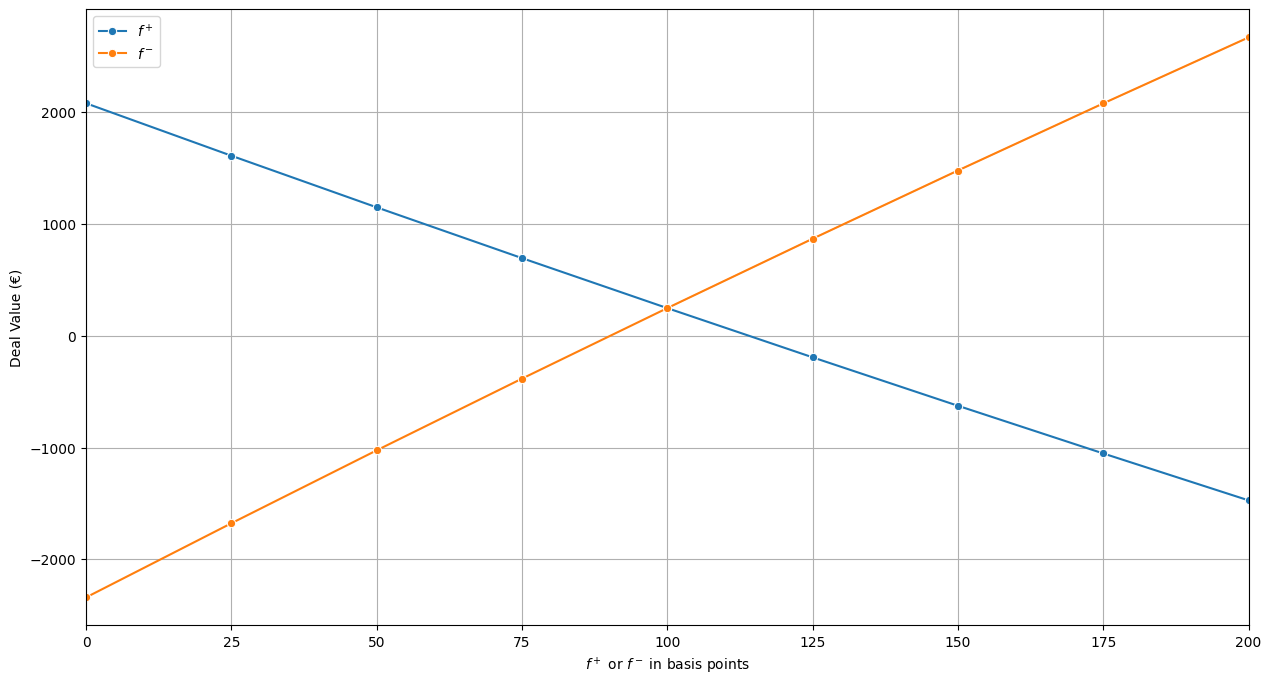

In [8]:
forGraphSpreadP = simTable.iloc[np.where((simTable['V0']=='swap'))].iloc[np.where((simTable['sm']==0.01))]
forGraphSpreadM = simTable.iloc[np.where((simTable['V0']=='swap'))].iloc[np.where((simTable['sp']==0.01))]
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.lineplot(x=forGraphSpreadP['sp']*10000, y=forGraphSpreadP['Total'],markers=True, marker = 'o', dashes=False, label = '$f^+$')
ax = sns.lineplot(x=forGraphSpreadM['sm']*10000, y=forGraphSpreadM['Total'],markers=True, marker = 'o', dashes=False, label = '$f^-$')
ax.grid()
ax.set(xlabel = '$f^+$ or $f^-$ in basis points', ylabel = 'Deal Value (€)')
ax.set_xlim(0,200)

<Axes: xlabel='sp', ylabel='Total'>

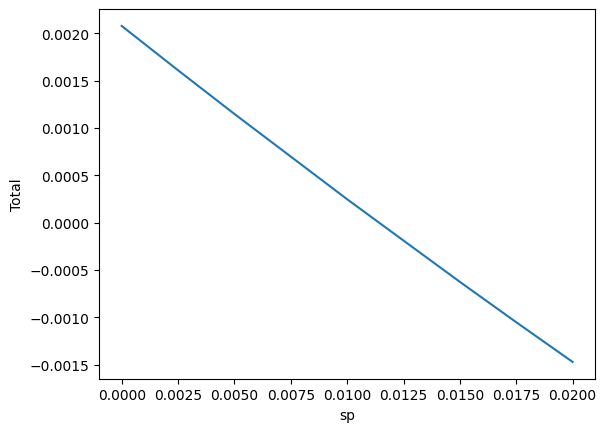